In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

from nff.data import Dataset, split_train_validation_test, collate_dicts, to_tensor
from nff.train import Trainer, get_trainer, get_model, load_model, loss, hooks, metrics, evaluate

from nff.nn.tensorgrad import *

In [3]:
dataset = Dataset.from_file('./data/dataset.pth.tar')

In [5]:
DEVICE = 3

batch = dict()

for key in dataset.props.keys():
    try:
        batch[key] = dataset.props[key][0].to(DEVICE)
    except:
        pass 

In [6]:
params = {
    'n_atom_basis': 256,
    'n_filters': 256,
    'n_gaussians': 32,
    'n_convolutions': 4,
    'cutoff': 5.0,
    'trainable_gauss': True
}

model = get_model(params).to(DEVICE)

In [8]:
H = get_schnet_hessians(batch, model, device=DEVICE)

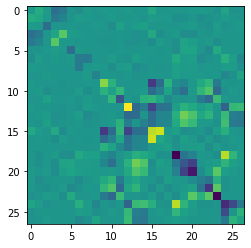

In [11]:
plt.imshow(H[0].detach().cpu().numpy())
plt.show()